# Homework 2 - MATH420
## Camilo Velez R

In [6]:
using DataFrames, CSV

## 1)

In [34]:
df = CSV.read("./data.csv", DataFrame, header=0);

In [35]:
dfma = Matrix(df);
dfmat = dfma';

In [38]:
x = zeros(211, 160);

In [39]:
for t in 2:211
    for k in 1:160
        x[t,k] = dfmat[t,k] - dfmat[t-1, k]
    end
end

## 2)
### Algorithm 1 - Eigenpairs

In [52]:
r = sum(t -> t*t', eachcol(x));

In [92]:
using LinearAlgebra, MultivariateStats, Plots

## a)

In [83]:
pca1 = fit(PCA, x; method = :cov, pratio=0.9)

PCA(indim = 211, outdim = 4, principalratio = 0.9178432278567026)

Pattern matrix (unstandardized loadings):
────────────────────────────────────────────────────────
            PC1          PC2           PC3           PC4
────────────────────────────────────────────────────────
1     0.0          0.0          0.0           0.0
2     0.0          0.0          0.0           0.0
3     0.0          0.0          0.0           0.0
4     0.0          0.0          0.0           0.0
5     0.0          0.0          0.0           0.0
6     0.0973336   -0.0389771   -0.060296     -0.0264868
7     0.0          0.0          0.0           0.0
8     0.0947082   -0.0680815    0.0883947    -0.00231259
9     0.0          0.0          0.0           0.0
10    0.178988    -0.0240707   -0.0222677    -0.0133938
11    0.0315587   -0.0133819   -0.0180373    -0.00567144
12    0.160892    -0.100084     0.0589346     0.0536052
13    0.17332     -0.0172593    0.0120078     0.0775315
14    0.192316    -0.143205     

Using eigenpairs, $d=4$, ratio of explained variance is about $0.9178432278567026$

In [86]:
pca1_all = fit(PCA, x; method=:cov);


In [103]:
function plotvars(p::PCA)
    return scatter(1:size(p)[2], principalvars(p))
end

plotvars (generic function with 1 method)

Ploting all singular values for the first algorithm

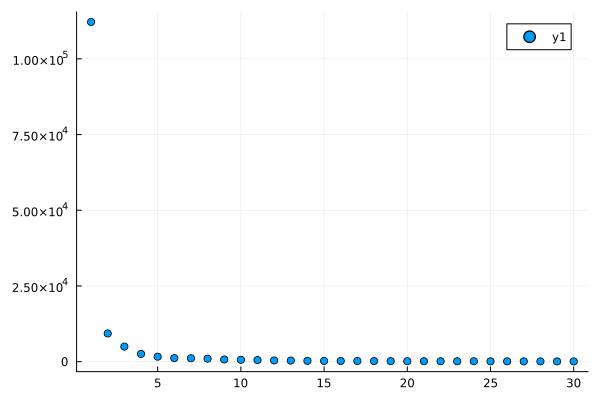

In [107]:
plotvars(pca1_all)

Only plotting the first four

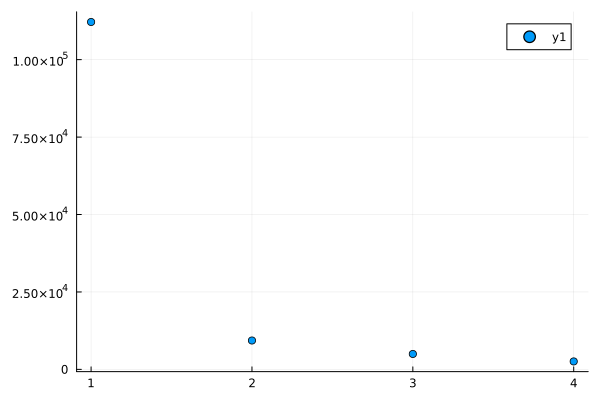

In [105]:
plotvars(pca1)

In [135]:
function plotx1(p::PCA)
    global xhat = reconstruct(p, predict(p, x[:,1]))
    return plot(1:length(xhat), [x[:,1], xhat], label=["real" "predicted"])
end


plotx1 (generic function with 1 method)

## b)

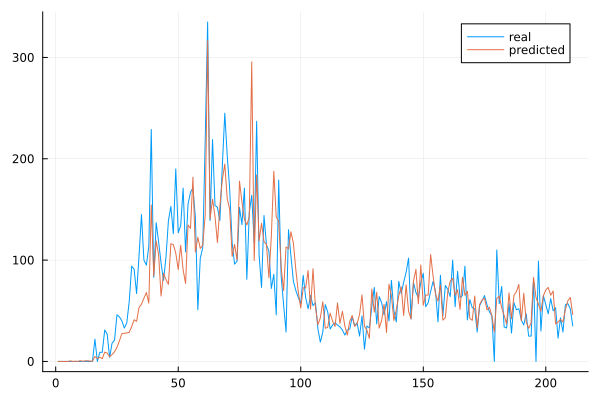

In [136]:
plotx1(pca1)

## c)

First 6 eigenvectors

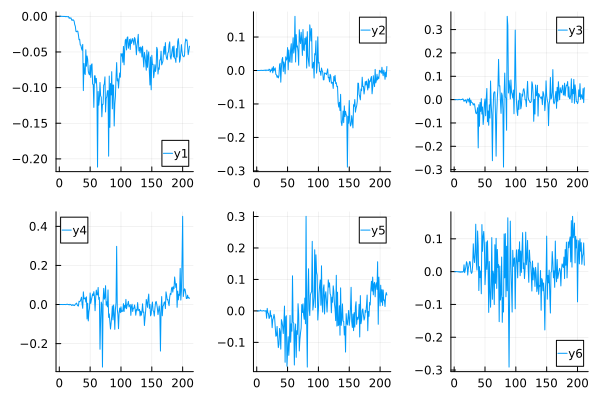

In [134]:
plot(1:211, eigvecs(pca1_all)[:, 1:6], layout=(2,3))

### d)

In [139]:
norm(x[:, 1] - xhat)

432.6156590324073

## Using SVD

## a)

In [140]:
pca2 = fit(PCA, x; method = :svd, pratio=0.9)

PCA(indim = 211, outdim = 4, principalratio = 0.9178432278567025)

Pattern matrix (unstandardized loadings):
──────────────────────────────────────────────────────────────
              PC1            PC2            PC3            PC4
──────────────────────────────────────────────────────────────
1    -1.85912e-13    4.68765e-14    1.17414e-14    1.39544e-14
2     0.0            1.60719e-14   -3.91381e-15    6.49451e-15
3     0.0            2.14293e-14    0.0           -4.56371e-15
4     9.07772e-18    5.35732e-15   -3.13105e-14    2.53637e-14
5     0.0           -1.33933e-15   -3.91381e-15   -2.2292e-14
6     0.0973336     -0.0389771     -0.060296      -0.0264868
7     0.0           -2.61588e-18    0.0           -5.61687e-15
8     0.0947082     -0.0680815      0.0883947     -0.00231259
9    -6.60491e-29    0.0            0.0           -2.80844e-15
10    0.178988      -0.0240707     -0.0222677     -0.0133938
11    0.0315587     -0.0133819     -0.0180373     -0.00567144
12    0.160892  

Using eigenpairs, $d=4$, ratio of explained variance is about $0.9178432278567026$

In [142]:
pca2_all = fit(PCA, x; method=:svd);


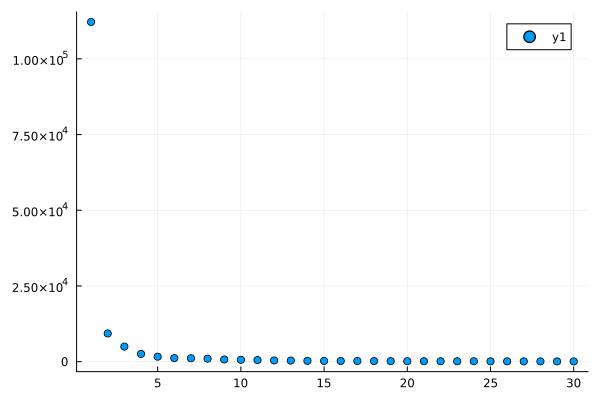

In [143]:
plotvars(pca2_all)

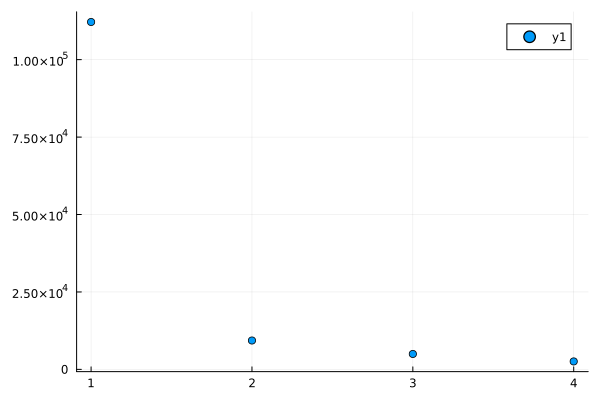

In [144]:
plotvars(pca2)

### b)

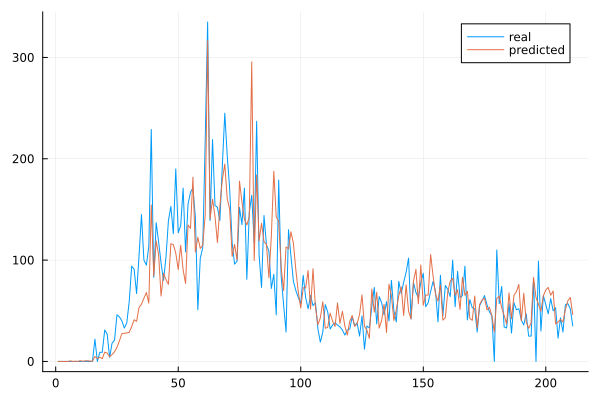

In [145]:
plotx1(pca2)

### c)
First 6 eigenvectors

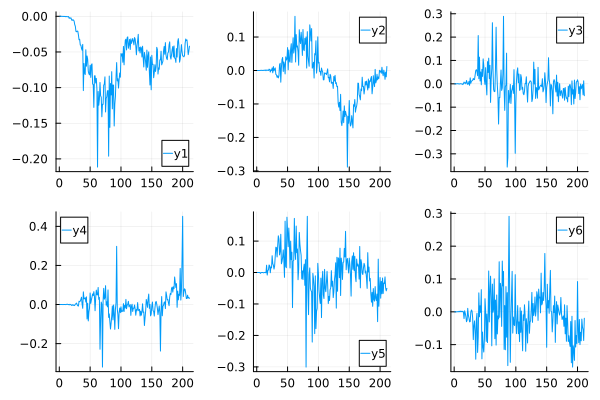

In [146]:
plot(1:211, eigvecs(pca2_all)[:, 1:6], layout=(2,3))

### d)

In [147]:
norm(x[:, 1] - xhat)

432.615659032407